In [1]:
import matplotlib.pyplot as plt
import numpy as np
from kshape.core_gpu import kshape as ks_gpu
import joblib
import pandas as pd
import seaborn as sns
plt.rcParams['font.sans-serif'] = 'Times New Roman'
plt.rcParams['mathtext.fontset'] = 'stix'  # 设置数学公式字体为stix
plt.rcParams["text.usetex"] = False
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号
from matplotlib.ticker import FuncFormatter, MaxNLocator

In [2]:
#请注意，这部分代码涉及很多切片索引，我编程时也是按照结果为导向的，其中的具体细节非常非常难读懂
BVOCs = [
    '1,3-丁二烯浓度',
    '丁烯浓度',
    '异戊二烯浓度',
    '戊烯浓度',
    '己烯、甲基环戊烷浓度',
    '苯乙烯浓度',
]
VOCs = ['甲硫醇浓度', '1,3-丁二烯浓度', '丁烯浓度', '丙酮、丁烷浓度', '正丙醇浓度', '甲硫醚、乙硫醇浓度', '氯乙烷浓度', '异戊二烯浓度', '戊烯浓度', '戊烷、异戊烷浓度',
        '二甲基甲酰胺浓度', '甲酸乙酯浓度', '二硫化碳、丙硫醇浓度', '苯浓度', '环己烯浓度', '己烯、甲基环戊烷浓度', '正己烷、二甲基丁烷浓度', '乙硫醚、丁硫醇浓度', '甲苯浓度', '苯胺浓度',
        '二甲基二硫醚浓度', '1,1-二氯乙烯浓度', '甲基环己烷浓度', '正庚烷浓度', '三乙胺浓度', '乙酸正丙酯浓度', '二亚乙基三胺浓度', '苯乙烯浓度', '二甲苯、乙苯浓度', '1,3-二氯丙烯浓度',
        '正辛烷浓度', '乙酸正丁酯浓度', '己硫醇浓度', '二甲苯酚浓度', '三氯乙烯浓度', '二乙基苯浓度', '苯甲酸甲酯浓度', '磷酸三甲酯浓度', '正癸醇浓度', '二氯苯浓度', '二乙基苯胺浓度',
        '十一烷浓度', '四氯乙烯浓度', '正十二烷浓度', '二溴甲烷浓度', '1,2,4-三氯苯浓度', '正十三烷浓度', '1,2-二溴乙烷浓度']

columnall = ['甲硫醇浓度', '1,3-丁二烯浓度', '丁烯浓度', '丙酮、丁烷浓度', '正丙醇浓度', '甲硫醚、乙硫醇浓度', '氯乙烷浓度', '异戊二烯浓度', '戊烯浓度', '戊烷、异戊烷浓度',
             '二甲基甲酰胺浓度', '甲酸乙酯浓度', '二硫化碳、丙硫醇浓度', '苯浓度', '环己烯浓度', '己烯、甲基环戊烷浓度', '正己烷、二甲基丁烷浓度', '乙硫醚、丁硫醇浓度', '甲苯浓度',
             '苯胺浓度', '二甲基二硫醚浓度', '1,1-二氯乙烯浓度', '甲基环己烷浓度', '正庚烷浓度', '三乙胺浓度', '乙酸正丙酯浓度', '二亚乙基三胺浓度', '苯乙烯浓度', '二甲苯、乙苯浓度',
             '1,3-二氯丙烯浓度', '正辛烷浓度', '乙酸正丁酯浓度', '己硫醇浓度', '二甲苯酚浓度', '三氯乙烯浓度', '二乙基苯浓度', '苯甲酸甲酯浓度', '磷酸三甲酯浓度', '正癸醇浓度',
             '二氯苯浓度', '二乙基苯胺浓度', '十一烷浓度', '四氯乙烯浓度', '正十二烷浓度', '二溴甲烷浓度', '1,2,4-三氯苯浓度', '正十三烷浓度', '1,2-二溴乙烷浓度', '0.25um',
             '0.28um', '0.30um', '0.35um', '0.40um', '0.45um', '0.50um', '0.58um', '0.65um', '0.70um', '0.80um',
             '1.00um', '1.30um', '1.60um', '2.00um', '2.50um', '3.00um', '3.50um', '4.00um', '5.00um', '6.50um',
             '7.50um', '8.50um', '10.00um', '12.50um', '15.00um', '17.50um', '20.00um', '25.00um', '30.00um', '32.00um',
             'PM10', 'PM2.5', 'PM1', 'SO2', 'NOx', 'NO', 'CO', 'O3', '负氧离子', '地面层净辐射', '地面层温度', '地面层湿度']

tchoose = ['异戊二烯浓度', '1,3-丁二烯浓度', '甲苯浓度', '二甲苯、乙苯浓度']
clsutervar = ['异戊二烯浓度', '1,3-丁二烯浓度', '甲苯浓度', '二甲苯、乙苯浓度', 'NOx', 'O3', 'PM1']

In [3]:
BVOCsen = [ '1,3-Butadiene', 'Butene', 'Isoprene', 'Pentene', 'Hexene and Methylcyclopentane', 'Styrene' ]

VOCsen = ['Methyl Mercaptan', '1,3-Butadiene', 'Butene', 'Acetone and Butane', 'N-Propanol', 'Methyl Sulfide and Ethyl Mercaptan', 'Chloroethane', 'Isoprene', 'Pentene', 'Pentane and Isopentane', 'Dimethylformamide', 'Ethyl Formate', 'Carbon Disulfide and Propyl Mercaptan', 'Benzene', 'Cyclohexene', 'Hexene and Methylcyclopentane', 'N-Hexane and Dimethylbutane', 'Ethyl Sulfide and Butyl Mercaptan', 'Toluene', 'Aniline', 'Dimethyl Disulfide', '1,1-Dichloroethylene', 'Methylcyclohexane', 'N-Heptane', 'Triethylamine', 'Propyl Acetate', 'Diethylamine Triamine', 'Styrene', 'Xylene and Ethylbenzene', '1,3-Dichloropropene', 'N-Octane', 'Butyl Acetate', 'Hexyl Mercaptan', 'Xylene Phenol', 'Trichloroethylene', 'Diethylbenzene', 'Methyl Benzoate', 'Trimethyl Phosphate', 'N-Decanol', 'Dichlorobenzene', 'Diethyl Aniline', 'Undecane', 'Tetrachloroethylene', 'N-Dodecane', 'Dibromomethane', '1,2,4-Trichlorobenzene', 'N-Tridecane', '1,2-Dibromoethane']
Tname = ['Isoprene',
    '1,3-Butadiene',
    'Butene',
    'Pentene']

In [4]:

clusterDML = ['异戊二烯浓度', '1,3-丁二烯浓度', '甲苯浓度', '二甲苯、乙苯浓度', 'NOx', 'O3', 'PM1', 'SO2', '地面层净辐射', '地面层温度', '地面层湿度']
#金海
Month = ["Aug", "Sept", "Oct", "Nov", "Dec", "Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul"]
#金海的合并
datajh = joblib.load("datanpjh.pkl")
datadicjh = joblib.load("datanpjh.pkl")
dataTVOCjh = joblib.load("TVOCjh")
dataTVOCVMDtempjh = pd.DataFrame(joblib.load("dataTVOCVMDjh.pkl"))
datatempjh = joblib.load('dataVMDjh.pkl')
datatempmjh = []
dataTVOCVMDjh = []
A = 0
B = 0
for i in range(len(datajh)):
    A = A + datadicjh[i].shape[0]
    datatempmjh.append(datatempjh.loc[B:(A - 1)].reset_index(drop=True))
    dataTVOCVMDjh.append(dataTVOCVMDtempjh.loc[B:(A - 1)].reset_index(drop=True))
    B = B + datadicjh[i].shape[0]
#崇明
#崇明的合并
datacm = joblib.load("datanpcm.pkl")
datadiccm = joblib.load("datanpcm.pkl")
dataTVOCcm = joblib.load("TVOCcm")
dataTVOCVMDtempcm = pd.DataFrame(joblib.load("dataTVOCVMDcm.pkl"))
datatempcm = joblib.load('dataVMDcm.pkl')
dataTVOCVMDcm = []
datatempmcm = []
A = 0
B = 0
for i in range(len(datacm)):
    A = A + datadiccm[i].shape[0]
    datatempmcm.append(datatempcm.loc[B:(A - 1)].reset_index(drop=True))
    dataTVOCVMDcm.append(dataTVOCVMDtempcm.loc[B:(A - 1)].reset_index(drop=True))
    B = B + datadiccm[i].shape[0]
monthchoose = [Month.index("Aug"), Month.index("Jun"), Month.index("Jul")]
place = ["jh", "cm"]

In [5]:
# Reload the data
datacluster = pd.read_excel("dataDMLnoscale.xlsx", index_col=0)

In [6]:
def process_time(df):
    df["Hour_Min_Sec"] = df.index.time
    df["Hour_Min"] = df.index.strftime('%H:%M')
    df["Hour"] = df.index.hour
    return df


def combinedata(data,comname):
    combined_data = pd.concat(data, axis=0)
    grouped = combined_data.groupby(comname).agg(["mean", "std"])

    # Extract hour, minute, and second and convert to total seconds
    if comname=="Hour":
        grouped['Datetime'] = grouped.index
        grouped['seconds'] = grouped.index.astype(int) * 3600
    else:
        # Convert datetime.time to datetime.datetime for dt accessor
        grouped['Datetime'] = pd.to_datetime(grouped.index.astype(str))
        grouped['seconds'] = grouped['Datetime'].dt.hour * 3600 + grouped['Datetime'].dt.minute * 60 + grouped['Datetime'].dt.second

    return grouped

def replace_outliers_with_mean(df, column_name):
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # 计算序列的均值
    mean_value = df[column_name].mean()

    # 将异常值替换为均值
    df.loc[(df[column_name] < lower_bound) | (df[column_name] > upper_bound), column_name] = mean_value

    return df

def process_and_replace_outliers(df, column_name):
    df = replace_outliers_with_mean(df, column_name)
    df = process_time(df)
    return df

datajh_time_processed = [process_and_replace_outliers(datajh[df], '异戊二烯浓度') for df in monthchoose]
datacm_time_processed = [process_and_replace_outliers(datacm[df], '异戊二烯浓度') for df in monthchoose]

groupedjh = combinedata(datajh_time_processed, "Hour_Min_Sec")
groupedcm = combinedata(datacm_time_processed, "Hour_Min_Sec")

C:\Users\aa271\AppData\Local\Temp\ipykernel_35828\2896545868.py:10: FutureWarning: ['Hour_Min'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  grouped = combined_data.groupby(comname).agg(["mean", "std"])
C:\Users\aa271\AppData\Local\Temp\ipykernel_35828\2896545868.py:10: FutureWarning: ['Hour_Min'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  grouped = combined_data.groupby(comname).agg(["mean", "std"])


In [7]:
from matplotlib.patches import Patch
def plot_timeseries(data, ax, title, Column_Name,truename, grouped, groupplot,start,end):
    p1 = ax.fill_between(grouped['seconds'],
                         grouped[(Column_Name, "mean")] - 1.96 * grouped[(Column_Name, "std")] / np.sqrt(len(data)),
                         grouped[(Column_Name, "mean")] + 1.96 * grouped[(Column_Name, "std")] / np.sqrt(len(data)),
                         color="gray", linewidth=1, alpha=0.25)

    p2 = ax.plot(groupplot['seconds'], groupplot[(Column_Name, "mean")], color="#75809C", linewidth=1,alpha=0.8)

    # Set x-ticks for every half hour
    ticks = np.arange(0, 24 * 3600, 2300)  # 1800 seconds = 30 minutes
    ax.set_xticks(ticks)

    # Convert seconds back to HH:MM format for x-ticks
    labels = [f"{int(s / 3600):02d}:{int((s % 3600) / 60):02d}" for s in ticks]
    ax.set_xticklabels(labels, rotation=60, fontsize=10)

    ax.set_xlabel('Time (HH:MM)', fontsize=12)
    ax.set_ylabel(truename, fontsize=14)
    ax.set_title(title, fontsize=15)

    # Add grid lines
    ax.grid(True, linestyle='--', which='both', color='gray', alpha=0.5)

    # Set the font size for y-axis ticks
    ax.tick_params(axis='y', labelsize=14)

    # Highlight the peak range
    ax.axvspan(time_to_seconds(start), time_to_seconds(end), color='#B95756', alpha=0.3)

    max_y = grouped[(Column_Name, "mean")].max()  # get max y-value for positioning the text
    ax.text(time_to_seconds(start), max_y * 0.8, start, color='black', fontsize=13, ha='center')
    ax.text(time_to_seconds(end), max_y * 0.8, end, color='black', fontsize=13, ha='center')

def time_to_seconds(time_str):
    """Convert HH:MM format string to seconds since midnight."""
    h, m = map(int, time_str.split(":"))
    return h * 3600 + m * 60

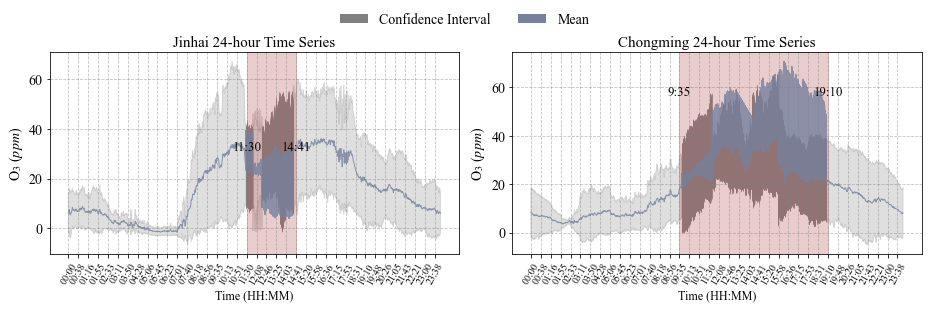

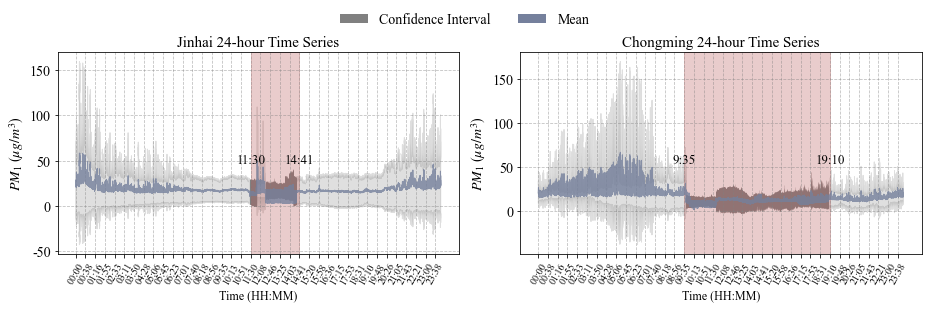

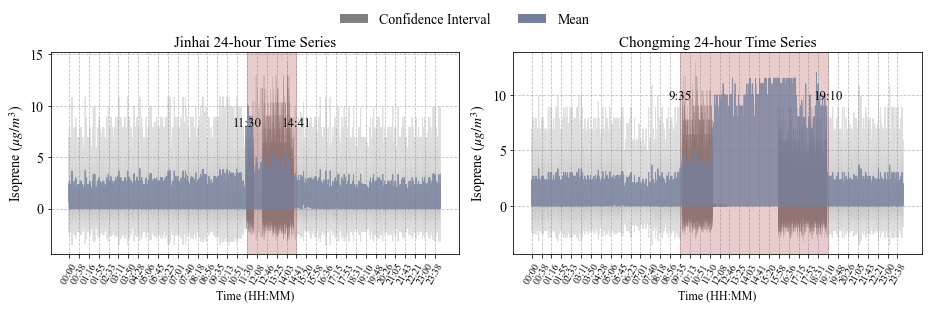

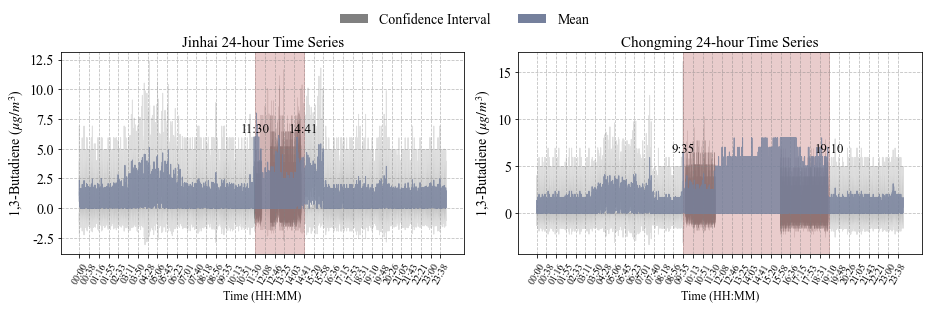

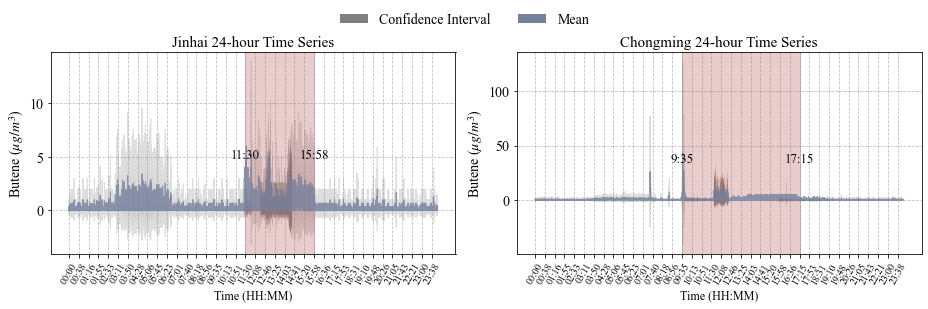

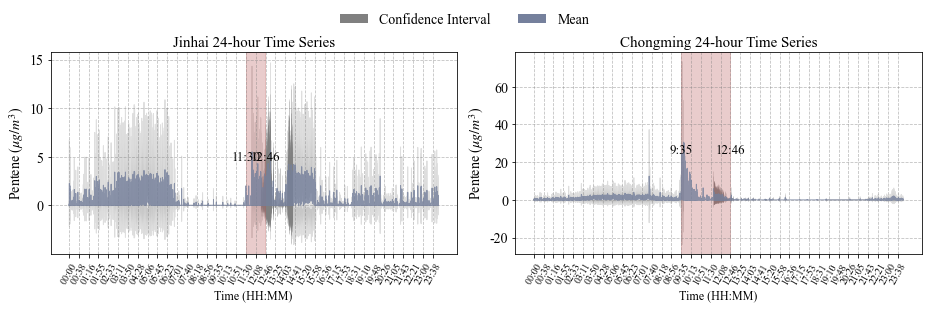

In [8]:
sten=[(["11:30","14:41"],["9:35","19:10"]),(["11:30","14:41"],["9:35","19:10"]),(["11:30","14:41"],["9:35","19:10"]),(["11:30","14:41"],["9:35","19:10"]),(["11:30","15:58"],["9:35","17:15"]),(["11:30","12:46"],["9:35","12:46"])]

BVOCsc=['O3','PM1',
    '异戊二烯浓度',
        '1,3-丁二烯浓度',
    '戊烯浓度',
    '丁烯浓度'
]
Truename= ['O$_3$ ($ppm$)','$PM_1$ ($μg/m^3$)','Isoprene ($μg/m^3$)',
    '1,3-Butadiene ($μg/m^3$)',
    'Butene ($μg/m^3$)',
    'Pentene ($μg/m^3$)']

for bcol in range(len(BVOCsc)):

    # Plot
    fig, axes = plt.subplots(1, 2, figsize=(13, 4))
    plot_timeseries(datajh_time_processed, axes[0], 'Jinhai 24-hour Time Series', BVOCsc[bcol],Truename[bcol], groupedjh, groupedjh,sten[bcol][0][0],sten[bcol][0][1])
    plot_timeseries(datacm_time_processed, axes[1], 'Chongming 24-hour Time Series', BVOCsc[bcol],Truename[bcol],groupedcm, groupedcm,sten[bcol][1][0],sten[bcol][1][1])

    # Legend
    nameb = ["Confidence Interval", "Mean"]
    legend_elements = [
        Patch(facecolor="gray", label=nameb[0]),
        Patch(facecolor="#75809C", label=nameb[1])
    ]
    fig.legend(legend_elements, nameb, title='', frameon=False, loc="lower center", fontsize=14, ncol=2, bbox_to_anchor=(0.5, 0.95))

    plt.tight_layout()
    plt.savefig(BVOCsc[bcol]+"时段综合AJJ.svg", bbox_inches='tight')
    plt.show()

In [9]:
from matplotlib.patches import Patch

def remove_outliers(ser):
    Q1 = ser.quantile(0.25)
    Q3 = ser.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # 计算序列的均值
    mean_value = ser.mean()

    # 将异常值替换为均值
    ser[(ser < lower_bound) | (ser > upper_bound)] = mean_value

    return ser

# 提取月份和地点的子集数据
def get_month_data(location, month):
    subset = datacluster[(datacluster["Place"] == location) & (datacluster["Month"] == month)]
    return subset

def clusterplot(data, column, columnchoose, cluster, fig, ax):
    clusterN = 4
    data.columns = column
    data["cluster"] = cluster
    from sklearn.preprocessing import MinMaxScaler

    t = data.index
    color = cluster_colors

    for i in range(clusterN):
        cluster_data = data.cluster.copy()
        cluster_data.columns = "label"
        if i != 0:
            cluster_data[cluster_data != i] = 0
            cluster_data[cluster_data == i] = 1
        if i == 0:
            cluster_data[cluster_data != 0] = -2
            cluster_data[cluster_data == 0] = 1
            cluster_data[cluster_data != 1] = 0

        y = cluster_data.values
        splits = np.where(y[1:] != y[:-1])[0] + 1
        splits = np.concatenate(([0], splits, [len(y) - 1]))

        for k in range(len(splits) - 1):
            if y[splits[k]]:
                ax.axvspan(t[splits[k]], t[splits[k + 1]], alpha=0.5, color=color[i])
    ax.set_xlim(-100, np.max(list(data.index)) + 1200)
    # plt.legend(frameon=False, loc="right", fontsize=7)
    plt.tight_layout()

In [ ]:
# variables_to_plot = ["异戊二烯浓度", "PM1", "地面层温度"]
# cpal = ["#53565C", "#478058", "#2A4C65"]
# linestyle=['-','--',':']
# cluster_colors = ['#94A684', '#FFDBAA', '#E4E4D0', '#FFEEF4']


# # 创建一个2行3列的子图布局
# fig, axes = plt.subplots(2, 3, figsize=(30, 10))
#
#
# # 遍历两个地点
# for p, location in enumerate(place):
#     if location == "jh":
#         data_source = datajh
#         data_temp = datatempmjh
#         locationname="Jinhai"
#     else:
#         data_source = datacm
#         data_temp = datatempmcm
#         locationname="Chongming"
#
#     # 针对每个地点遍历monthchoose中的月份进行绘图
#     for idx, uo in enumerate(monthchoose):
#
#         month_str = Month[uo]
#         data_subset = get_month_data(location, month_str)
#
#         month_data = data_source[uo]
#         month_temp_data = data_temp[uo]
#
#         ax = axes[p, idx]  # 选择正确的子图
#         ax2=ax.twinx()
#         ax3=ax.twinx()
#         ax3.spines.right.set_position(("axes", 1.09))
#         axcome=[ax,ax2,ax3]
#
#         for var_idx, variable in enumerate(variables_to_plot):
#             if uo==11 and locationname=="Chongming":
#                 sns.lineplot(x=month_temp_data.index, y=remove_outliers(month_data[variable])[:-1], ax=axcome[var_idx], color=cpal[var_idx],alpha=0.3)
#                 sns.lineplot(x=month_temp_data.index, y=remove_outliers(month_temp_data[variable]), ax=axcome[var_idx], color=cpal[var_idx],linewidth=3,linestyle=linestyle[var_idx])
#             else:
#                 sns.lineplot(x=month_temp_data.index, y=month_data[variable], ax=axcome[var_idx], color=cpal[var_idx],alpha=0.3)
#                 sns.lineplot(x=month_temp_data.index, y=month_temp_data[variable], ax=axcome[var_idx], color=cpal[var_idx],linewidth=3,linestyle=linestyle[var_idx])
#
#         # # 使用 clusterplot 函数绘制背景色
#         clusterplot(data_subset.reset_index(drop=True), data_subset.columns, [], data_subset["ClusterLabel"].reset_index(drop=True).values, fig, ax)
#
#
#
#         # 设置标题和图例
#         ax.set_ylabel(r"Isoprene Concentration ($μg/m^3$)",fontsize=15)
#         ax2.set_ylabel(r"PM$_1$ Concentration ($μg/m^3$)",fontsize=15)
#         ax3.set_ylabel(r"Temperature (℃)",fontsize=15)
#
#
#         # 设置x-ticks为month_data的索引
#         interval = 400  # 每隔200个点显示一个时间
#         ticks = month_temp_data.index[::interval]
#         labels = month_data.index[::interval]
#         ax.set_xticks(ticks)
#         ax.set_xticklabels(labels, rotation=70)  # rotation可以使标签旋转，提高可读性
#         ax.tick_params(axis='both', labelsize=13)
#
#         ax.set_xlim(0,month_temp_data.shape[0])
#         ax.set_title(f"{locationname} Station {Month[uo]}.", fontsize=20)
#
#         axcome=[ax,ax2,ax3]
#         for m,axis in enumerate(axcome):  # <-- 添加此循环来移除每个子图的上和右边框
#             axis.spines['top'].set_visible(False)
#
#             if m ==0:
#                 axis.spines['right'].set_visible(False)
#
#         ax.grid()
#
# plt.tight_layout()
#
# # 为了创建图例，我们将在不显示的地方绘制三条线
# lines = [plt.Line2D([0], [0], color=cpal[0], lw=3,linestyle=linestyle[0]),
#          plt.Line2D([0], [0], color=cpal[1], lw=3,linestyle=linestyle[1]),
#          plt.Line2D([0], [0], color=cpal[2], lw=3,linestyle=linestyle[2])]
# labels = ['Isoprene', 'PM$_1$', 'Temperature']
# # fig.legend(lines, labels, frameon=False, loc="upper center", fontsize=17, ncol=3, bbox_to_anchor=(0.5, 1.1))
#
# # 颜色代表的聚类
# # 为了创建图例，我们将使用四个Patch对象代表聚类颜色
# cluster_patches = [Patch(facecolor=color) for color in cluster_colors]
# cluster_labels = ['Subsequence 1', 'Subsequence 2', 'Subsequence 3', 'Subsequence 4']
#
# fig.legend(lines + cluster_patches, labels + cluster_labels, frameon=False, loc="upper center", fontsize=17, ncol=7, bbox_to_anchor=(0.5, 1.1))
# fig.savefig("浓度月份变化+聚类特征.svg", bbox_inches='tight')
# plt.show()

C:\Users\aa271\AppData\Local\Temp\ipykernel_35828\3895782977.py:52: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
C:\Users\aa271\AppData\Local\Temp\ipykernel_35828\3895782977.py:52: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
C:\Users\aa271\AppData\Local\Temp\ipykernel_35828\3895782977.py:52: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
C:\Users\aa271\AppData\Local\Temp\ipykernel_35828\3895782977.py:52: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
C:\Users\aa271\AppData\Local\Temp\ipykernel_35828\3895782977.py:52: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight

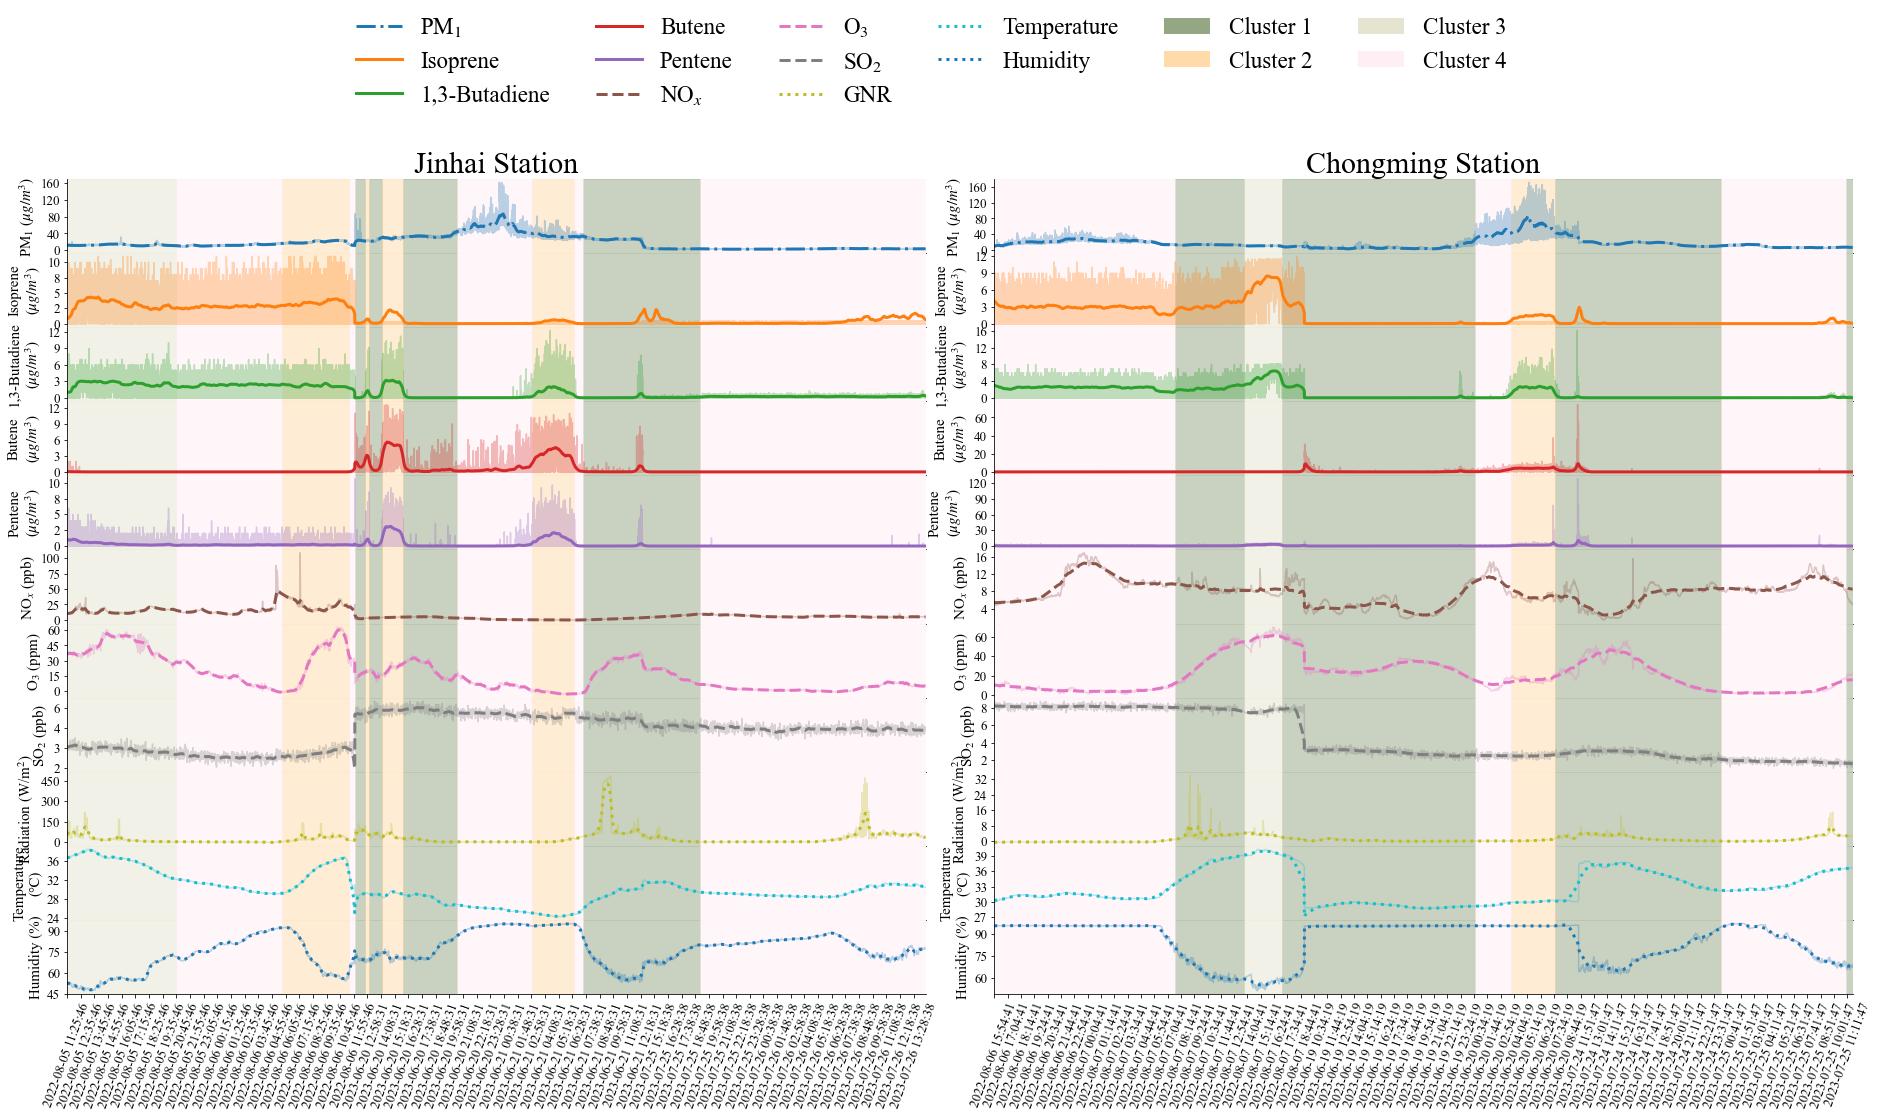

In [10]:
# 更新的变量、颜色、线型和真实名称列表
variables_to_plot = ['PM1', '异戊二烯浓度','1,3-丁二烯浓度','丁烯浓度', '戊烯浓度','NOx','O3','SO2','地面层净辐射', '地面层温度', '地面层湿度']
cpal = sns.color_palette("tab10", len(variables_to_plot))  # 使用seaborn的tab10调色板生成足够数量的颜色
linestyle = ['-.', '-', '-', '-', '-', '--', '--', '--', ':', ':', ':']  # 您可能需要根据您的需要进行调整
realnamesunit = ['PM$_1$ ($μg/m^3$)','Isoprene\n($μg/m^3$)', '1,3-Butadiene\n($μg/m^3$)', 'Butene\n($μg/m^3$)', 'Pentene\n($μg/m^3$)', 'NO$_x$ (ppb)', 'O$_3$ (ppm)', 'SO$_2$ (ppb)', 'Radiation (W/m$^2$)', 'Temperature\n(℃)', 'Humidity (%)']
realnames = ['PM$_1$', 'Isoprene', '1,3-Butadiene', 'Butene', 'Pentene', 'NO$_x$', 'O$_3$', 'SO$_2$', 'GNR', 'Temperature', 'Humidity']
cluster_colors = ['#94A684', '#FFDBAA', '#E4E4D0', '#FFEEF4']



fig = plt.figure(figsize=(32, 15))

# 创建一个 GridSpec 布局，根据variables_to_plot的长度
gs = fig.add_gridspec(len(variables_to_plot), 2, hspace=0, wspace=0.08)

# 遍历两个地点
for p, location in enumerate(place):
    if location == "jh":
        data_source = datajh
        data_temp = datatempmjh
        locationname = "Jinhai"
    else:
        data_source = datacm
        data_temp = datatempmcm
        locationname = "Chongming"

    # 使用get_month_data函数从datacluster中提取子集
    cluster_subsets = [get_month_data(location, Month[m]) for m in monthchoose]

    combined_data = pd.concat([data_source[m] for m in monthchoose], ignore_index=False)
    combined_temp_data = pd.concat([data_temp[m] for m in monthchoose], ignore_index=True)
    combined_cluster = pd.concat(cluster_subsets, ignore_index=True)

    # 检查长度是否匹配
    if len(combined_temp_data) != len(combined_data):
        # 将较长的数据截断为较短的长度
        min_length = min(len(combined_temp_data), len(combined_data))
        combined_temp_data = combined_temp_data.iloc[:min_length]
        combined_data = combined_data.iloc[:min_length]

    for var_idx, variable in enumerate(variables_to_plot):
        # 对于每个变量，选择一个子图
        ax = fig.add_subplot(gs[var_idx, p])

        sns.lineplot(x=combined_temp_data.index, y=combined_data[variable], ax=ax, color=cpal[var_idx], alpha=0.3)
        sns.lineplot(x=combined_temp_data.index, y=combined_temp_data[variable], ax=ax, color=cpal[var_idx], linewidth=3, linestyle=linestyle[var_idx])

        # 使用 clusterplot 函数绘制背景色
        clusterplot(combined_data.reset_index(drop=True), combined_data.columns, [], combined_cluster["ClusterLabel"].reset_index(drop=True).values, fig, ax)

         # 设置标题和图例
        ax.set_ylabel(realnamesunit[var_idx], fontsize=15)  # 使用realnames作为y轴标签

        # 设置x-ticks为combined_temp_data的索引
        if var_idx == len(variables_to_plot) - 1:  # 只在最后一个小子图中显示x轴标签
            interval = 600  # 每隔400个点显示一个时间
            ticks = combined_temp_data.index[::interval]
            labels = combined_data.index[::interval]
            ax.set_xticks(ticks)
            ax.set_xticklabels(labels, rotation=70)  # rotation可以使标签旋转，提高可读性
        else:
            ax.set_xticks([])

        ax.tick_params(axis='both', labelsize=13)
        ax.set_xlim(0, combined_temp_data.shape[0])

        if var_idx == 0:
            ax.set_title(f"{locationname} Station", fontsize=30)

        # 移除每个子图的上和右边框
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)

        #设置刻度
        ax.tick_params(axis='both', labelsize=13)

        def format_ticks(x, pos):
            return f'{x:.0f}'  # 这里设置为保留两位小数，您可以根据需要进行修改
        # 设置x轴刻度的格式
        ax.yaxis.set_major_formatter(FuncFormatter(format_ticks))
        ax.yaxis.set_major_locator(MaxNLocator(nbins=5))

        # ax.grid()
# 为了创建图例，我们将在不显示的地方绘制线
lines = [plt.Line2D([0], [0], color=cpal[i], lw=3, linestyle=linestyle[i]) for i in range(len(variables_to_plot))]

# 创建代表聚类颜色的图例
cluster_patches = [Patch(facecolor=color) for color in cluster_colors]
cluster_labels = ['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4']

fig.legend(lines + cluster_patches, realnames + cluster_labels, frameon=False, loc="upper center", fontsize=23, ncol=6, bbox_to_anchor=(0.5, 1.05))
# fig.tight_layout()
fig.savefig("浓度月份变化+聚类特征2.svg", bbox_inches='tight')
plt.show()


C:\Users\aa271\AppData\Local\Temp\ipykernel_24536\3208036290.py:58: UserWarning: Glyph 24322 (\N{CJK UNIFIED IDEOGRAPH-5F02}) missing from current font.
  plt.tight_layout()
C:\Users\aa271\AppData\Local\Temp\ipykernel_24536\3208036290.py:58: UserWarning: Glyph 25098 (\N{CJK UNIFIED IDEOGRAPH-620A}) missing from current font.
  plt.tight_layout()
C:\Users\aa271\AppData\Local\Temp\ipykernel_24536\3208036290.py:58: UserWarning: Glyph 20108 (\N{CJK UNIFIED IDEOGRAPH-4E8C}) missing from current font.
  plt.tight_layout()
C:\Users\aa271\AppData\Local\Temp\ipykernel_24536\3208036290.py:58: UserWarning: Glyph 28911 (\N{CJK UNIFIED IDEOGRAPH-70EF}) missing from current font.
  plt.tight_layout()
C:\Users\aa271\AppData\Local\Temp\ipykernel_24536\3208036290.py:58: UserWarning: Glyph 27987 (\N{CJK UNIFIED IDEOGRAPH-6D53}) missing from current font.
  plt.tight_layout()
C:\Users\aa271\AppData\Local\Temp\ipykernel_24536\3208036290.py:58: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) miss

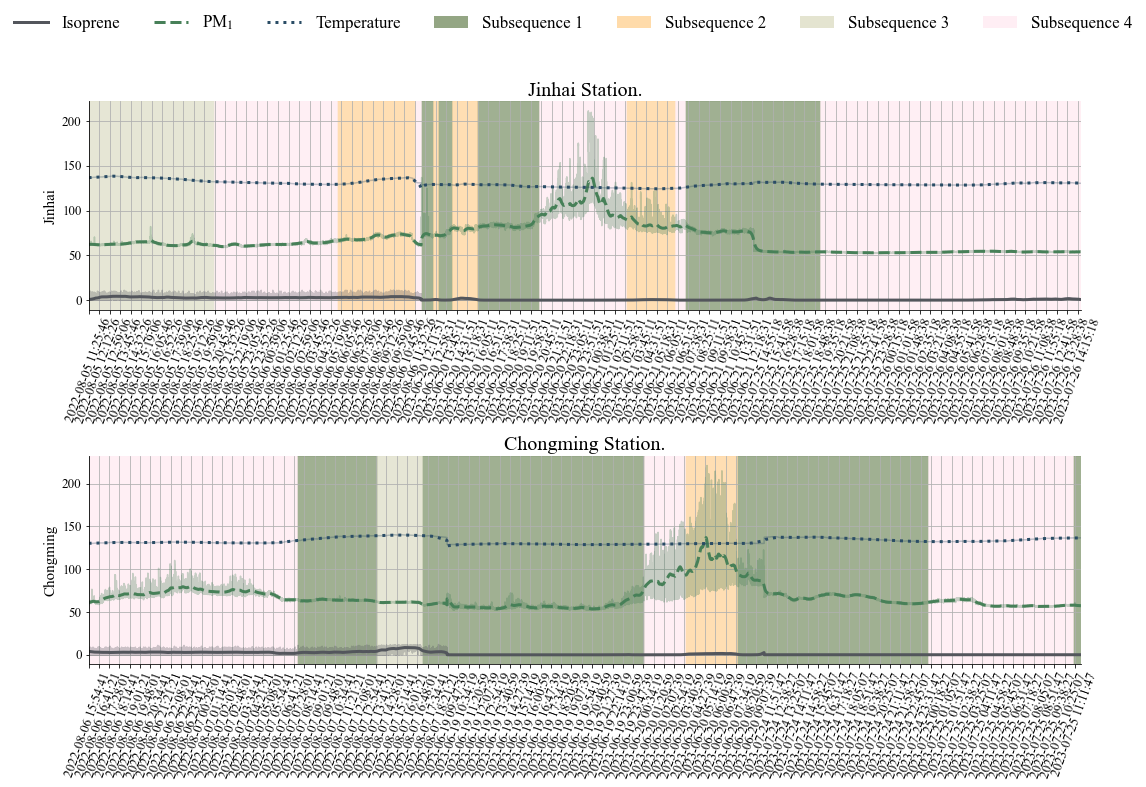

In [40]:
# 创建一个2x1的子图布局
fig, axes = plt.subplots(2, 1, figsize=(15, 10))


# 遍历两个地点
for p, location in enumerate(place):
    if location == "jh":
        data_source = datajh
        data_temp = datatempmjh
        locationname = "Jinhai"
    else:
        data_source = datacm
        data_temp = datatempmcm
        locationname = "Chongming"

    # 使用get_month_data函数从datacluster中提取子集
    cluster_subsets = [get_month_data(location, Month[m]) for m in monthchoose]

    combined_data = pd.concat([data_source[m] for m in monthchoose], ignore_index=False)
    combined_temp_data = pd.concat([data_temp[m] for m in monthchoose], ignore_index=True)
    combined_cluster = pd.concat(cluster_subsets, ignore_index=True)

    ax = axes[p]  # 选择正确的子图

    # 检查长度是否匹配
    if len(combined_temp_data) != len(combined_data):
        # 将较长的数据截断为较短的长度
        min_length = min(len(combined_temp_data), len(combined_data))
        combined_temp_data = combined_temp_data.iloc[:min_length]
        combined_data = combined_data.iloc[:min_length]


    for var_idx, variable in enumerate(variables_to_plot):
        offset = var_idx * 50  # Y轴的偏移量
        sns.lineplot(x=combined_temp_data.index, y=combined_data[variable] + offset, ax=ax, color=cpal[var_idx], alpha=0.3)
        sns.lineplot(x=combined_temp_data.index, y=combined_temp_data[variable] + offset, ax=ax, color=cpal[var_idx], linewidth=3, linestyle=linestyle[var_idx])

        # 使用 clusterplot 函数绘制背景色
        clusterplot(combined_data.reset_index(drop=True), combined_data.columns, [], combined_cluster["ClusterLabel"].reset_index(drop=True).values, fig, ax)

        # 设置标题和图例
        ax.set_ylabel(locationname, fontsize=15)

        # 设置x-ticks为combined_temp_data的索引
        interval = 400  # 每隔400个点显示一个时间
        ticks = combined_temp_data.index[::interval]
        labels = combined_data.index[::interval]
        ax.set_xticks(ticks)
        ax.set_xticklabels(labels, rotation=70)  # rotation可以使标签旋转，提高可读性
        ax.tick_params(axis='both', labelsize=13)
        ax.set_xlim(0, combined_temp_data.shape[0])
        ax.set_title(f"{locationname} Station.", fontsize=20)

        # 移除每个子图的上和右边框
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)

        ax.grid()

plt.tight_layout()

# 为了创建图例，我们将在不显示的地方绘制三条线
lines = [plt.Line2D([0], [0], color=cpal[i], lw=3, linestyle=linestyle[i]) for i in range(3)]
labels = ['Isoprene', 'PM$_1$', 'Temperature']

# 创建代表聚类颜色的图例
cluster_patches = [Patch(facecolor=color) for color in cluster_colors]
cluster_labels = ['Subsequence 1', 'Subsequence 2', 'Subsequence 3', 'Subsequence 4']

fig.legend(lines + cluster_patches, labels + cluster_labels, frameon=False, loc="upper center", fontsize=17, ncol=7, bbox_to_anchor=(0.5, 1.1))
# fig.savefig("浓度月份变化+聚类特征.svg", bbox_inches='tight')
plt.show()

In [10]:
datar=pd.DataFrame()
for i in monthchoose:
    datar=pd.concat([datar,datatempmjh[i]])
for i in monthchoose:
    datar=pd.concat([datar,datatempmcm[i]])

In [11]:
datarB=datar[BVOCs]
datarB.columns=BVOCsen
datarB=datarB.mean()
datarV=datar[VOCs]
datarV.columns=VOCsen
datarV=datarV.mean()

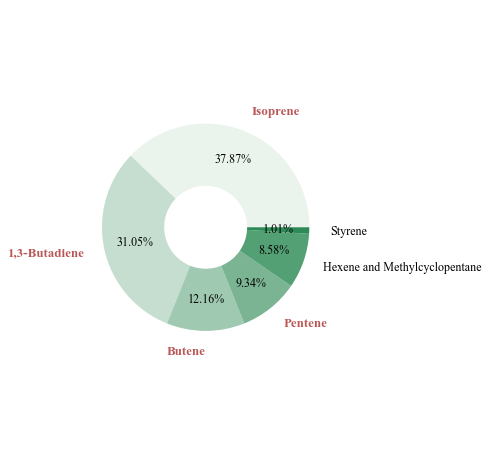

In [21]:

from matplotlib import font_manager as fm

# 创建一个3行4列的子图布局
fig, axes = plt.subplots(1, 1, figsize=(7, 7))

labels = datarB.sort_values(ascending=False).index
sizes = datarB.sort_values(ascending=False)*100



ax1 = axes
ax2 = ax1.twinx()  # 创建一个共享同一个x轴的新轴

startangle = -np.argmax(sizes) * 360.0 / len(sizes)
colors = sns.light_palette('seagreen',n_colors=len(BVOCs))
patches, texts, autotexts = ax1.pie(sizes, labels=labels, autopct='%1.2f%%',
        shadow=False, startangle=startangle, colors=colors, labeldistance=1.2,pctdistance=0.7, radius=0.4,wedgeprops=dict(width=0.24))
# labeldistance: 控制labels显示的位置
# pctdistance: 控制百分比显示的位置
# radius: 控制切片突出的距离

# 重新设置字体大小
proptease = fm.FontProperties()
proptease.set_size("large")
# font size include: ‘xx-small’,x-small’,'small’,'medium’,‘large’,‘x-large’,‘xx-large’ or number, e.g. '12'
plt.setp(autotexts, fontproperties=proptease)
plt.setp(texts, fontproperties=proptease)

for text in texts:
    if text.get_text() in Tname:
        text.set_color('#B95756')
        text.set_fontsize(13)
        text.set_weight('bold')



ax1.axis('equal')
ax1.set_title("",y=0.2,fontsize=14)
# ax2 只显示图例（legend）
ax2.axis('off')
# ax1.legend(patches, labels_top, bbox_to_anchor=(1.3,0.6), frameon=False,fontsize=10)


# plt.subplots_adjust(hspace=0,wspace=5)
fig.tight_layout()
fig.savefig('BVOCs占比.svg', bbox_inches='tight')
plt.show()

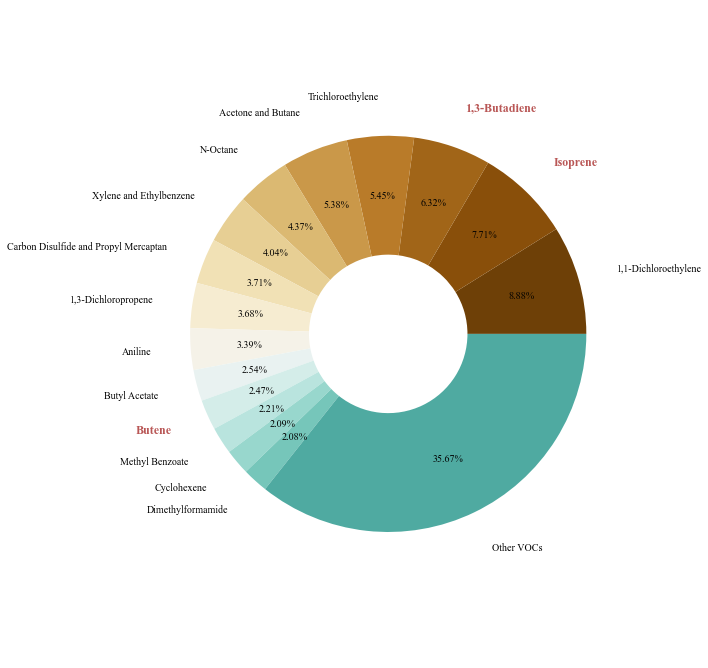

In [22]:
from matplotlib import font_manager as fm

# 创建一个3行4列的子图布局
fig, axes = plt.subplots(1, 1, figsize=(10, 10))

labels = datarV.sort_values(ascending=False).index
sizes = datarV.sort_values(ascending=False)*100

top_n = 15
sizes_top = sizes[:top_n].tolist()
sizes_top.append(sizes[top_n:].sum())

# 对应地修改labels
labels_top = labels[:top_n].tolist()
labels_top.append('Other VOCs')




ax1 = axes
ax2 = ax1.twinx()  # 创建一个共享同一个x轴的新轴


startangle = -np.argmax(sizes) * 360.0 / len(sizes_top)
colors = sns.color_palette(palette='BrBG',n_colors=top_n+5)
patches, texts, autotexts = ax1.pie(sizes_top, labels=labels_top, autopct='%1.2f%%',
        shadow=False, startangle=startangle, colors=colors, labeldistance=1.2,pctdistance=0.7, radius=0.4,wedgeprops=dict(width=0.24))
# labeldistance: 控制labels显示的位置
# pctdistance: 控制百分比显示的位置
# radius: 控制切片突出的距离

ax1.axis('equal')

# 重新设置字体大小
proptease = fm.FontProperties()
proptease.set_size("medium")
# font size include: ‘xx-small’,x-small’,'small’,'medium’,‘large’,‘x-large’,‘xx-large’ or number, e.g. '12'
plt.setp(autotexts, fontproperties=proptease)
plt.setp(texts, fontproperties=proptease)
ax1.set_title("",y=0.2,fontsize=13)
# ax2 只显示图例（legend）
ax2.axis('off')
# ax1.legend(patches, labels_top, bbox_to_anchor=(1.3,0.6), frameon=False,fontsize=10)

for text in texts:
    if text.get_text() in Tname:
        text.set_color('#B95756')
        text.set_fontsize(12)
        text.set_weight('bold')

# plt.subplots_adjust(hspace=0,wspace=5)
fig.tight_layout()
fig.savefig('VOCs占比.svg', bbox_inches='tight')
plt.show()

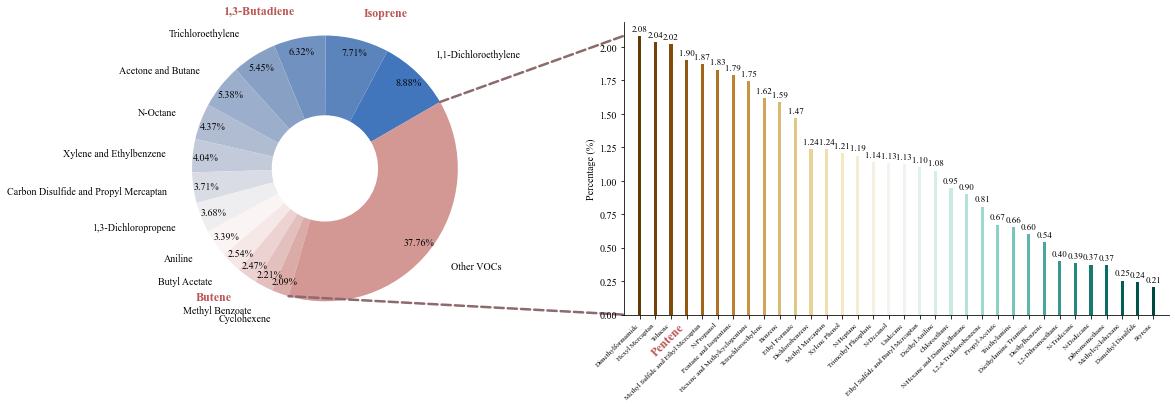

In [23]:

from matplotlib.patches import ConnectionPatch

# Sort the data
sorted_datarV = (datarV / datarV.sum()).sort_values(ascending=False)
labels = sorted_datarV.index
sizes = sorted_datarV * 100

top_n = 14
sizes_top = sizes[:top_n].tolist()
if len(sizes) > top_n:
    sizes_top.append(sizes[top_n:].sum())

# Modify labels accordingly
labels_top = labels[:top_n].tolist()
if len(labels) > top_n:
    labels_top.append('Other VOCs')

# Extracting the data for "Other VOCs" for the bar chart
sizes_other = sizes[top_n:].tolist()
labels_other = labels[top_n:].tolist()

# Set up the figure and axes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 7))
fig.subplots_adjust(wspace=0.05,bottom=0.3)  # Adjusting the space between the two plots

# Create the pie chart
startangle = 30
colors = sns.color_palette(palette='vlag', n_colors=min(top_n+1, len(sizes_top))+4)
patches, texts, autotexts = ax1.pie(sizes_top, labels=labels_top, autopct='%1.2f%%',
                                    shadow=False, startangle=startangle, colors=colors,
                                    labeldistance=1.2, pctdistance=0.9, radius=0.4, wedgeprops=dict(width=0.24))

ax1.axis('equal')

# Set font size for pie chart
proptease = fm.FontProperties()
proptease.set_size("medium")
plt.setp(autotexts, fontproperties=proptease)
plt.setp(texts, fontproperties=proptease)

for text in texts:
    if text.get_text() in Tname:
        text.set_color('#B95756')
        text.set_fontsize(12)
        text.set_weight('bold')

# Create the bar chart for "Other VOCs"
width = .2
colors_other = sns.color_palette(palette='BrBG', n_colors=len(sizes_other))
for j, (height, label) in enumerate(zip(sizes_other, labels_other)):
    bc = ax2.bar(j, height, width, color=colors_other[j])
    ax2.bar_label(bc, labels=[f"{height:.2f}"], label_type='edge',fontsize=9, padding=3)

ax2.set_title('')
ax2.set_xticks(range(len(labels_other)))
ax2.set_xticklabels(labels_other, rotation=45, ha="right", fontsize=7)
ax2.set_ylabel('Percentage (%)')
ax2.set_xlim(-1, len(labels_other))
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)

xticks = ax2.get_xticklabels()
for label in xticks:
    if label.get_text() in Tname:
        label.set_color('#B95756')
        label.set_fontsize(12)
        label.set_weight('bold')

# Use ConnectionPatch to draw lines between the two plots
theta1, theta2 = patches[-1].theta1, patches[-1].theta2
center, r = patches[-1].center, patches[-1].r

# draw top connecting line
x = r * np.cos(np.pi / 180 * theta2) + center[0]
y = r * np.sin(np.pi / 180 * theta2) + center[1]
con = ConnectionPatch(xyA=(-width / 2-1, max(sizes_other)), coordsA=ax2.transData,
                      xyB=(x, y), coordsB=ax1.transData)
con.set_color([0, 0, 0])
con.set_linestyle('--')
con.set_linewidth(2.5)
con.set_edgecolor('#8D6A6E')
ax2.add_artist(con)

# draw bottom connecting line
x = r * np.cos(np.pi / 180 * theta1) + center[0]
y = r * np.sin(np.pi / 180 * theta1) + center[1]
con = ConnectionPatch(xyA=(-width / 2-1, 0), coordsA=ax2.transData,
                      xyB=(x, y), coordsB=ax1.transData)
con.set_color([0, 0, 0])
ax2.add_artist(con)
con.set_linestyle('--')
con.set_linewidth(2.5)
con.set_edgecolor('#8D6A6E')

# plt.tight_layout()

plt.savefig('VOCs占比2.svg', bbox_inches='tight')
plt.show()

In [6]:
realnamesunit = ['PM$_1$ ($μg/m^3$)','Isoprene\n($μg/m^3$)', '1,3-Butadiene\n($μg/m^3$)', 'Butene\n($μg/m^3$)', 'Pentene\n($μg/m^3$)', 'NO$_x$ (ppb)', 'O$_3$ (ppm)', 'SO$_2$ (ppb)', 'Radiation (W/m$^2$)', 'Temperature\n(℃)', 'Humidity (%)']
realnames = ['PM$_1$', 'Isoprene', '1,3-Butadiene', 'Butene', 'Pentene', 'NO$_x$', 'O$_3$', 'SO$_2$', 'GNR', 'Temperature', 'Humidity']

In [16]:
# Setting the group size
group_size = 100

# Function to calculate the mean for numeric columns and the most common value for non-numeric columns
def aggregate_group(group):
    agg_funcs = {col: 'mean' if pd.api.types.is_numeric_dtype(group[col]) else lambda x: x.mode()[0] for col in group.columns}
    return group.agg(agg_funcs)

# Group the data and apply the aggregation function
grouped_data = datacluster.groupby(datacluster.index // group_size).apply(aggregate_group)

# Resetting the index
grouped_data.reset_index(drop=True, inplace=True)

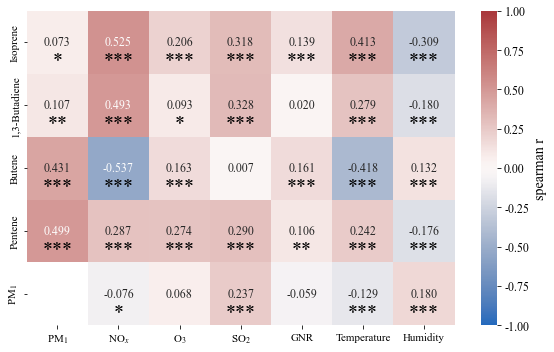

In [27]:
from scipy.stats import spearmanr,pearsonr
from statsmodels.stats.multitest import multipletests


# Specifying the columns for x and y axes
x_columns = ['异戊二烯浓度', '1,3-丁二烯浓度', '丁烯浓度', '戊烯浓度','PM1']
y_columns = ['PM1', 'NOx', 'O3', 'SO2', '地面层净辐射', '地面层温度', '地面层湿度']

def get_significance_markers(p_value):
    """
    Returns a string of asterisks representing the level of significance of the p-value.
    - "***": p < 0.001
    - "**": 0.001 <= p < 0.01
    - "*": 0.01 <= p < 0.05
    - "": p >= 0.05
    """
    if p_value < 0.001:
        return "***"
    elif p_value < 0.01:
        return "**"
    elif p_value < 0.05:
        return "*"
    else:
        return ""

def get_correlations(df, x_columns, y_columns):
    correlations = pd.DataFrame(index=x_columns, columns=y_columns)
    pvalues = pd.DataFrame(index=x_columns, columns=y_columns)

    for x_col in x_columns:
        for y_col in y_columns:
            if df[x_col].dtype in [np.float64, np.int64] and df[y_col].dtype in [np.float64, np.int64]:
                sp = spearmanr(df[x_col], df[y_col])
                correlations.loc[x_col, y_col] = sp[0]
                pvalues.loc[x_col, y_col] = sp[1]
            else:
                correlations.loc[x_col, y_col] = np.nan
                pvalues.loc[x_col, y_col] = np.nan

            if x_col == y_col:  # 新增判断
                correlations.loc[x_col, y_col] = np.nan
                pvalues.loc[x_col, y_col] = np.nan

    return correlations.astype("float"), pvalues.astype("float")

# Compute correlations and p-values
correlations, uncorrected_p_values = get_correlations(grouped_data, x_columns, y_columns)

# Correct p-values for multiple testing and check significance (True if the corrected p-value < 0.05)
shape = uncorrected_p_values.values.shape
significant_matrix = multipletests(uncorrected_p_values.values.flatten())[0].reshape(
    shape
)

# Plotting
plt.figure(figsize=(8, 5))
heatmap =sns.heatmap(correlations, cmap="vlag", vmin=-1, vmax=1, annot=True, fmt=".3f", yticklabels=['Isoprene', '1,3-Butadiene', 'Butene', 'Pentene', 'PM$_1$'], xticklabels=['PM$_1$','NO$_x$', 'O$_3$', 'SO$_2$', 'GNR', 'Temperature', 'Humidity'],
                     cbar_kws={'label': 'spearman r'},annot_kws={"size": 12})

# Adding different levels of asterisks for significant correlations
for i in range(len(x_columns)):
    for j in range(len(y_columns)):
        p_value = uncorrected_p_values.iloc[i, j]
        marker = get_significance_markers(p_value)
        plt.text(j + 0.5, i + 0.8, marker, ha="center", va="center", color="black", fontsize=20)

# Adjusting the color bar (cbar) label size
cbar = heatmap.collections[0].colorbar
cbar.ax.yaxis.label.set_size(14)  # Adjust this value for cbar label size
cbar.ax.tick_params(labelsize=12)  # Setting cbar tick labels size

# Adjusting tick label sizes
plt.xticks(fontsize=11)  # Adjust font size for x-axis tick labels
plt.yticks(fontsize=11)  # Adjust font size for y-axis tick labels

plt.tight_layout()
plt.savefig(f'相关性.svg', bbox_inches='tight')
plt.show()

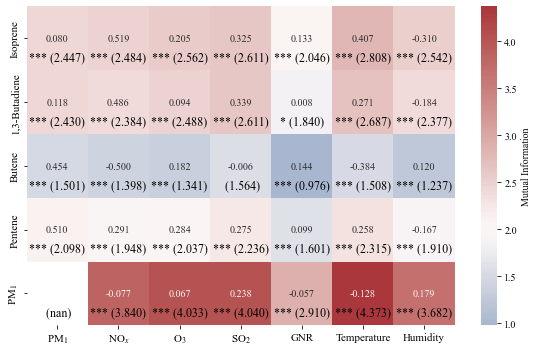

In [45]:
import itertools
from sklearn.feature_selection import mutual_info_regression
from sklearn.metrics import normalized_mutual_info_score
from statsmodels.stats.multitest import multipletests


# Specifying the columns for x and y axes
x_columns = ['异戊二烯浓度', '1,3-丁二烯浓度', '丁烯浓度', '戊烯浓度','PM1']
y_columns = ['PM1', 'NOx', 'O3', 'SO2', '地面层净辐射', '地面层温度', '地面层湿度']

# 计算互信息
def calculate_mutual_information(x, y):
    # 将数据转换为二维数组
    x = np.array(x).reshape(-1, 1)
    y = np.array(y)
    mi = mutual_info_regression(x, y)
    return mi[0]

def get_correlations(df, x_columns, y_columns):
    correlations = pd.DataFrame(index=x_columns, columns=y_columns)
    pvalues = pd.DataFrame(index=x_columns, columns=y_columns)
    mutual_information = pd.DataFrame(index=x_columns, columns=y_columns)

    for x_col in x_columns:
        for y_col in y_columns:
            if df[x_col].dtype in [np.float64, np.int64] and df[y_col].dtype in [np.float64, np.int64]:
                # Spearman相关性
                sp = spearmanr(df[x_col], df[y_col])
                correlations.loc[x_col, y_col] = sp[0]
                pvalues.loc[x_col, y_col] = sp[1]

                # 互信息
                mi = calculate_mutual_information(df[x_col], df[y_col])
                mutual_information.loc[x_col, y_col] = mi
            else:
                correlations.loc[x_col, y_col] = np.nan
                pvalues.loc[x_col, y_col] = np.nan
                mutual_information.loc[x_col, y_col] = np.nan

            if x_col == y_col:  # 新增判断
                correlations.loc[x_col, y_col] = np.nan
                pvalues.loc[x_col, y_col] = np.nan
                mutual_information.loc[x_col, y_col] = np.nan

    return correlations.astype("float"), pvalues.astype("float"), mutual_information.astype("float")


# 计算相关性、p值和互信息
correlations, uncorrected_p_values, mutual_info = get_correlations(datacluster, x_columns, y_columns)

# 正确处理多重检验的p值
shape = uncorrected_p_values.values.shape
significant_matrix = multipletests(uncorrected_p_values.values.flatten())[0].reshape(shape)

# 绘制heatmap
plt.figure(figsize=(8, 5))
heatmap = sns.heatmap(mutual_info, cmap="vlag", center=2, vmin=mutual_info.min().min(), vmax=mutual_info.max().max(),
                      annot=correlations, fmt=".3f",
                      yticklabels=['Isoprene', '1,3-Butadiene', 'Butene', 'Pentene', 'PM$_1$'],
                      xticklabels=['PM$_1$','NO$_x$', 'O$_3$', 'SO$_2$', 'GNR', 'Temperature', 'Humidity'],
                      cbar_kws={'label': 'Mutual Information'})
# 添加标记
for i in range(len(x_columns)):
    for j in range(len(y_columns)):
        p_value = uncorrected_p_values.iloc[i, j]
        mi_value = mutual_info.iloc[i, j]
        marker = get_significance_markers(p_value)
        # 在相关系数后面加上互信息值
        plt.text(j + 0.5, i + 0.8, f"{marker} ({mi_value:.3f})", ha="center", va="center", color="black", fontsize=12)

# 调整标签大小
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.tight_layout()
plt.savefig('相关性MI.svg', bbox_inches='tight')
plt.show()

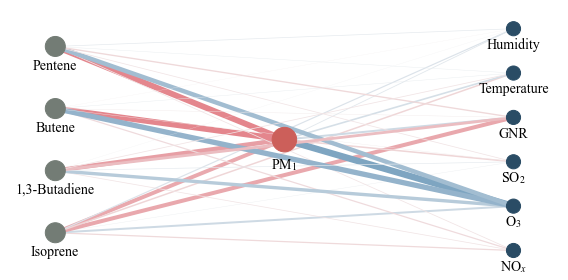

In [39]:
import networkx as nx

# Specifying the columns for x and y axes
x_columns = ['异戊二烯浓度', '1,3-丁二烯浓度', '丁烯浓度', '戊烯浓度','PM1']
y_columns = ['PM1', 'NOx', 'O3', 'SO2', '地面层净辐射', '地面层温度', '地面层湿度']


# Modified code to use a 'vlag' color gradient and exclude self-correlations

# Function to calculate correlations and p-values
def get_correlations(df, x_columns, y_columns):
    correlations = pd.DataFrame(index=x_columns, columns=y_columns)
    pvalues = pd.DataFrame(index=x_columns, columns=y_columns)

    # for x_col in x_columns:
    #     for y_col in y_columns:
    #         if x_col != y_col and df[x_col].dtype in [np.float64, np.int64] and df[y_col].dtype in [np.float64, np.int64]:
    #             sp = spearmanr(df[x_col], df[y_col])
    #             correlations.loc[x_col, y_col] = sp[0]
    #             pvalues.loc[x_col, y_col] = sp[1]
    #         else:
    #             correlations.loc[x_col, y_col] = np.nan
    #             pvalues.loc[x_col, y_col] = np.nan
    for x_col in x_columns:
        for y_col in y_columns:
            sp = spearmanr(df[x_col], df[y_col])
            correlations.loc[x_col, y_col] = sp[0]
            pvalues.loc[x_col, y_col] = sp[1]

            correlations.loc["PM1", "PM1"] = np.NAN
            pvalues.loc["PM1", "PM1"] = np.NAN

    return correlations.astype("float"), pvalues.astype("float")

# Compute correlations and p-values
correlations, uncorrected_p_values = get_correlations(grouped_data, x_columns, y_columns)

# Correct p-values for multiple testing and check significance
shape = uncorrected_p_values.values.shape
significant_matrix = multipletests(uncorrected_p_values.values.flatten())[0].reshape(shape)

# Creating the network graph
G = nx.Graph()

# Adding edges based on significant correlations
for i, x_col in enumerate(x_columns):
    for j, y_col in enumerate(y_columns):
        if significant_matrix[i, j]:
            weight = correlations.loc[x_col, y_col]
            G.add_edge(x_col, y_col, weight=weight)

# Custom layout for nodes
def custom_layout(G, x_columns, y_columns):
    pos = {}
    center_node = 'PM1'
    other_x_columns = [node for node in x_columns if node != center_node]
    other_y_columns = [node for node in y_columns if node != center_node]

    # Calculate spacing
    x_space = 1.0 / (len(other_x_columns) + 1)
    y_space = 1.0 / (len(other_y_columns) + 1)

    # Place other x_columns nodes
    for i, node in enumerate(other_x_columns):
        pos[node] = (0.2, i * x_space + x_space)

    # Place other y_columns nodes
    for i, node in enumerate(other_y_columns):
        pos[node] = (0.8, i * y_space + y_space)

    # Place 'PM1' in the middle
    pos[center_node] = (0.5, 0.5)  # Center position

    return pos

pos_custom = custom_layout(G, x_columns, y_columns)

#Renaming nodes in the network graph according to their order in x_columns and y_columns

node_labels = {}
newl=['Isoprene', '1,3-Butadiene', 'Butene', 'Pentene','PM$_1$', 'PM$_1$',  'NO$_x$', 'O$_3$', 'SO$_2$', 'GNR', 'Temperature', 'Humidity']
for i, node in enumerate(x_columns + y_columns):
    node_labels[node] = newl[i]

# Function to get color for each node
def get_node_color(node, x_columns, y_columns,center_node):
    if node == center_node:
        return '#CC5F5A'  # Color for PM1
    elif node in x_columns:
        return '#737C75'  # Color for x_columns
    elif node in y_columns:
        return '#2A4C65'  # Color for y_columns
    else:
        return '#75809C'  # Default color

def get_node_size(node, x_columns, y_columns, center_node):
    if node == center_node:
        return 600  # Larger size for the center node 'PM1'
    elif node in x_columns :
        return 400  # Size for x_columns
    elif node in y_columns:
        return 200  # Size y_columns nodes
    else:
        return 150  # Default size for other nodes



# Assign colors to nodes
node_colors = [get_node_color(node, x_columns, y_columns,'PM1') for node in G.nodes()]
# Assign sizes to nodes
node_sizes = [get_node_size(node, x_columns, y_columns, 'PM1') for node in G.nodes()]


# Drawing the network graph with new node labels
plt.figure(figsize=(8, 4))
nx.draw_networkx_nodes(G, pos_custom, node_size=node_sizes, node_color=node_colors)

# Drawing edges with width proportional to the absolute value of the correlation strength
for (u, v, d) in G.edges(data=True):
    color = sns.diverging_palette(240, 10, as_cmap=True)(0.5 + d['weight'] * 0.5)
    width = abs(d['weight']) * 10  # Adjusting the edge width based on the absolute value of correlation
    nx.draw_networkx_edges(G, pos_custom, edgelist=[(u, v)], width=width, edge_color=[color])

# Adjusting node labels to be slightly below the nodes
label_pos = {}
for node, position in pos_custom.items():
    if node == 'PM1':
        label_pos[node] = (position[0], position[1] - 0.08)  # Larger offset for 'PM1'
    elif node in x_columns :
        label_pos[node] = (position[0], position[1] - 0.06)  # Larger offset for 'PM1'
    elif node in y_columns:
        label_pos[node] = (position[0], position[1] - 0.05)  # Larger offset for 'PM1'
    else:
        label_pos[node] = (position[0], position[1] - 0.05)  # Larger offset for 'PM1'

# Redrawing the network graph with adjusted label positions


nx.draw_networkx_labels(G, label_pos, labels=node_labels, font_size=14)

0
plt.axis('off')

plt.tight_layout()
plt.savefig(f'相关性网络.svg', bbox_inches='tight')
plt.show()

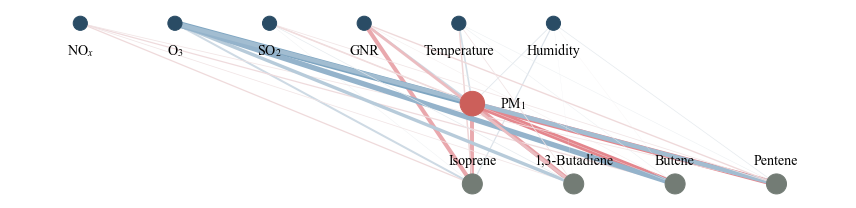

In [40]:
import networkx as nx

# Specifying the columns for x and y axes
x_columns = ['异戊二烯浓度', '1,3-丁二烯浓度', '丁烯浓度', '戊烯浓度','PM1']
y_columns = ['PM1', 'NOx', 'O3', 'SO2', '地面层净辐射', '地面层温度', '地面层湿度']


# Modified code to use a 'vlag' color gradient and exclude self-correlations

# Function to calculate correlations and p-values
def get_correlations(df, x_columns, y_columns):
    correlations = pd.DataFrame(index=x_columns, columns=y_columns)
    pvalues = pd.DataFrame(index=x_columns, columns=y_columns)

    # for x_col in x_columns:
    #     for y_col in y_columns:
    #         if x_col != y_col and df[x_col].dtype in [np.float64, np.int64] and df[y_col].dtype in [np.float64, np.int64]:
    #             sp = spearmanr(df[x_col], df[y_col])
    #             correlations.loc[x_col, y_col] = sp[0]
    #             pvalues.loc[x_col, y_col] = sp[1]
    #         else:
    #             correlations.loc[x_col, y_col] = np.nan
    #             pvalues.loc[x_col, y_col] = np.nan
    for x_col in x_columns:
        for y_col in y_columns:
            sp = spearmanr(df[x_col], df[y_col])
            correlations.loc[x_col, y_col] = sp[0]
            pvalues.loc[x_col, y_col] = sp[1]

            correlations.loc["PM1", "PM1"] = np.NAN
            pvalues.loc["PM1", "PM1"] = np.NAN

    return correlations.astype("float"), pvalues.astype("float")

# Compute correlations and p-values
correlations, uncorrected_p_values = get_correlations(grouped_data, x_columns, y_columns)

# Correct p-values for multiple testing and check significance
shape = uncorrected_p_values.values.shape
significant_matrix = multipletests(uncorrected_p_values.values.flatten())[0].reshape(shape)

# Creating the network graph
G = nx.Graph()

# Adding edges based on significant correlations
for i, x_col in enumerate(x_columns):
    for j, y_col in enumerate(y_columns):
        if significant_matrix[i, j]:
            weight = correlations.loc[x_col, y_col]
            G.add_edge(x_col, y_col, weight=weight)

# Custom layout for nodes
def custom_layout(G, x_columns, y_columns, center_node='PM1'):
    pos = {}

    # Spacing parameters
    x_space = 2.5 / (len(x_columns) - 1)
    y_space = 3.5 / (len(y_columns) - 1)

    # Setting positions for x and y columns nodes
    for i, node in enumerate(x_columns):
        if node != center_node:
            pos[node] = (i * x_space, 0)  # x_columns at y=1
    for i, node in enumerate(y_columns):
        if node != center_node:
            pos[node] = (i * y_space-3, 1)  # y_columns at y=0

    # Center node
    pos[center_node] = (0, 0.5)  # Center position

    return pos


pos_custom = custom_layout(G, x_columns, y_columns)

#Renaming nodes in the network graph according to their order in x_columns and y_columns

node_labels = {}
newl=['Isoprene', '1,3-Butadiene', 'Butene', 'Pentene','PM$_1$', 'PM$_1$',  'NO$_x$', 'O$_3$', 'SO$_2$', 'GNR', 'Temperature', 'Humidity']
for i, node in enumerate(x_columns + y_columns):
    node_labels[node] = newl[i]

# Function to get color for each node
def get_node_color(node, x_columns, y_columns,center_node):
    if node == center_node:
        return '#CC5F5A'  # Color for PM1
    elif node in x_columns:
        return '#737C75'  # Color for x_columns
    elif node in y_columns:
        return '#2A4C65'  # Color for y_columns
    else:
        return '#75809C'  # Default color

def get_node_size(node, x_columns, y_columns, center_node):
    if node == center_node:
        return 600  # Larger size for the center node 'PM1'
    elif node in x_columns :
        return 400  # Size for x_columns
    elif node in y_columns:
        return 200  # Size y_columns nodes
    else:
        return 150  # Default size for other nodes



# Assign colors to nodes
node_colors = [get_node_color(node, x_columns, y_columns,'PM1') for node in G.nodes()]
# Assign sizes to nodes
node_sizes = [get_node_size(node, x_columns, y_columns, 'PM1') for node in G.nodes()]


# Drawing the network graph with new node labels
plt.figure(figsize=(12, 3))
nx.draw_networkx_nodes(G, pos_custom, node_size=node_sizes, node_color=node_colors)

# Drawing edges with width proportional to the absolute value of the correlation strength
for (u, v, d) in G.edges(data=True):
    color = sns.diverging_palette(240, 10, as_cmap=True)(0.5 + d['weight'] * 0.5)
    width = abs(d['weight']) * 10  # Adjusting the edge width based on the absolute value of correlation
    nx.draw_networkx_edges(G, pos_custom, edgelist=[(u, v)], width=width, edge_color=[color])

# Adjusting node labels to be slightly below the nodes
label_pos = {}
for node, position in pos_custom.items():
    if node == 'PM1':
        label_pos[node] = (position[0]+0.25, position[1] )  # Larger offset for 'PM1'
    elif node in x_columns :
        label_pos[node] = (position[0], position[1] + 0.15)  # Larger offset for 'PM1'
    elif node in y_columns:
        label_pos[node] = (position[0], position[1] - 0.17)  # Larger offset for 'PM1'
    else:
        label_pos[node] = (position[0], position[1] - 0.05)  # Larger offset for 'PM1'

# Redrawing the network graph with adjusted label positions


nx.draw_networkx_labels(G, label_pos, labels=node_labels, font_size=14)

plt.axis('off')

plt.tight_layout()
plt.savefig(f'相关性网络2.svg', bbox_inches='tight')
plt.show()

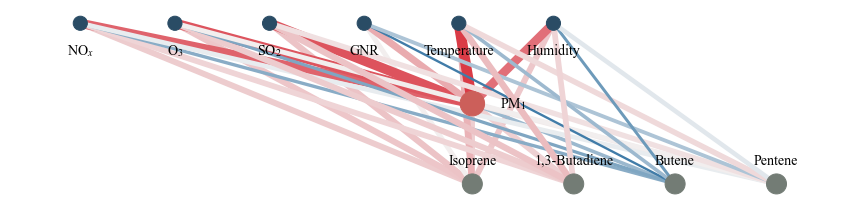

In [43]:
import networkx as nx

# Specifying the columns for x and y axes
x_columns = ['异戊二烯浓度', '1,3-丁二烯浓度', '丁烯浓度', '戊烯浓度','PM1']
y_columns = ['PM1', 'NOx', 'O3', 'SO2', '地面层净辐射', '地面层温度', '地面层湿度']


# Modified code to use a 'vlag' color gradient and exclude self-correlations

correlations=mutual_info

# Correct p-values for multiple testing and check significance
shape = uncorrected_p_values.values.shape
significant_matrix = multipletests(uncorrected_p_values.values.flatten())[0].reshape(shape)

# Creating the network graph
G = nx.Graph()

# Adding edges based on significant correlations
for i, x_col in enumerate(x_columns):
    for j, y_col in enumerate(y_columns):
        if significant_matrix[i, j]:
            weight = correlations.loc[x_col, y_col]
            G.add_edge(x_col, y_col, weight=weight)

# Custom layout for nodes
def custom_layout(G, x_columns, y_columns, center_node='PM1'):
    pos = {}

    # Spacing parameters
    x_space = 2.5 / (len(x_columns) - 1)
    y_space = 3.5 / (len(y_columns) - 1)

    # Setting positions for x and y columns nodes
    for i, node in enumerate(x_columns):
        if node != center_node:
            pos[node] = (i * x_space, 0)  # x_columns at y=1
    for i, node in enumerate(y_columns):
        if node != center_node:
            pos[node] = (i * y_space-3, 1)  # y_columns at y=0

    # Center node
    pos[center_node] = (0, 0.5)  # Center position

    return pos


pos_custom = custom_layout(G, x_columns, y_columns)

#Renaming nodes in the network graph according to their order in x_columns and y_columns

node_labels = {}
newl=['Isoprene', '1,3-Butadiene', 'Butene', 'Pentene','PM$_1$', 'PM$_1$',  'NO$_x$', 'O$_3$', 'SO$_2$', 'GNR', 'Temperature', 'Humidity']
for i, node in enumerate(x_columns + y_columns):
    node_labels[node] = newl[i]

# Function to get color for each node
def get_node_color(node, x_columns, y_columns,center_node):
    if node == center_node:
        return '#CC5F5A'  # Color for PM1
    elif node in x_columns:
        return '#737C75'  # Color for x_columns
    elif node in y_columns:
        return '#2A4C65'  # Color for y_columns
    else:
        return '#75809C'  # Default color

def get_node_size(node, x_columns, y_columns, center_node):
    if node == center_node:
        return 600  # Larger size for the center node 'PM1'
    elif node in x_columns :
        return 400  # Size for x_columns
    elif node in y_columns:
        return 200  # Size y_columns nodes
    else:
        return 150  # Default size for other nodes



# Assign colors to nodes
node_colors = [get_node_color(node, x_columns, y_columns,'PM1') for node in G.nodes()]
# Assign sizes to nodes
node_sizes = [get_node_size(node, x_columns, y_columns, 'PM1') for node in G.nodes()]


# Drawing the network graph with new node labels
plt.figure(figsize=(12, 3))
nx.draw_networkx_nodes(G, pos_custom, node_size=node_sizes, node_color=node_colors)


# 定义分界线值
dividing_line = 2

# 计算分界线值在颜色映射中的位置
def calculate_color_map_position(value, min_val, max_val, div_line):
    if value <= div_line:
        # 映射到 0 到 0.5
        return 0.5 * (value - min_val) / (div_line - min_val)
    else:
        # 映射到 0.5 到 1
        return 0.5 + 0.5 * (value - div_line) / (max_val - div_line)

# Drawing edges with width proportional to the absolute value of the correlation strength
for (u, v, d) in G.edges(data=True):
   # 计算颜色映射位置
    color_position = calculate_color_map_position(d['weight'], mi_min, mi_max, dividing_line)
    color = sns.diverging_palette(240, 10, as_cmap=True)(color_position)
    width = abs(d['weight']) * 2.4  # Adjusting the edge width based on the absolute value of correlation
    nx.draw_networkx_edges(G, pos_custom, edgelist=[(u, v)], width=width, edge_color=[color])

# Adjusting node labels to be slightly below the nodes
label_pos = {}
for node, position in pos_custom.items():
    if node == 'PM1':
        label_pos[node] = (position[0]+0.25, position[1] )  # Larger offset for 'PM1'
    elif node in x_columns :
        label_pos[node] = (position[0], position[1] + 0.15)  # Larger offset for 'PM1'
    elif node in y_columns:
        label_pos[node] = (position[0], position[1] - 0.17)  # Larger offset for 'PM1'
    else:
        label_pos[node] = (position[0], position[1] - 0.05)  # Larger offset for 'PM1'

# Redrawing the network graph with adjusted label positions


nx.draw_networkx_labels(G, label_pos, labels=node_labels, font_size=14)

plt.axis('off')

plt.tight_layout()
plt.savefig(f'相关性网络2MI.svg', bbox_inches='tight')
plt.show()

C:\Users\aa271\AppData\Local\Temp\ipykernel_5196\2532971055.py:18: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  pax = sns.barplot(y='Variable', x='Value', data=df_melted, ci="sd", capsize=0.1,


p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

1,3-丁二烯浓度_jh vs. 1,3-丁二烯浓度_cm: t-test independent samples, P_val:3.450e-30 t=-1.142e+01
异戊二烯浓度_jh vs. 异戊二烯浓度_cm: t-test independent samples, P_val:8.386e-32 t=-1.174e+01
丁烯浓度_jh vs. 丁烯浓度_cm: t-test independent samples, P_val:4.129e-03 t=-2.868e+00
戊烯浓度_jh vs. 戊烯浓度_cm: t-test independent samples, P_val:1.500e-165 t=-2.749e+01


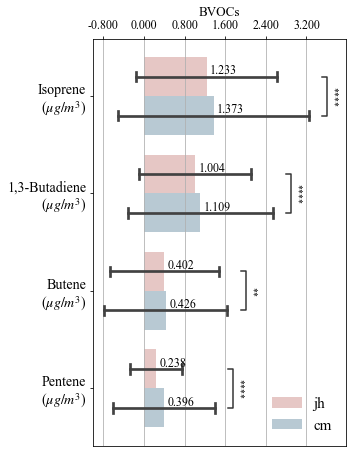

In [36]:
order = ['异戊二烯浓度', '1,3-丁二烯浓度', '丁烯浓度', '戊烯浓度']
hue_order = ["jh","cm"]

par1=[]
import itertools
for o in order:
    par2=[]
    for u in hue_order:
        par2.append((o,u))
    par2=tuple(itertools.combinations(par2,2))
    for y in par2:
        par1.append(y)


fig, ax = plt.subplots(1, 1, figsize=(5, 6.4))
df_melted = datacluster.melt(id_vars=["Place"], value_vars=order,
                    var_name='Variable', value_name='Value')
pax = sns.barplot(y='Variable', x='Value', data=df_melted, ci="sd", capsize=0.1,
                  palette=["#EBC2C0", "#B3CAD8"], ax=ax, hue="Place",
                  order=order, hue_order=hue_order, orient="h")


# ax.set_ylabel(BVOCs[uo]+"浓度 ($μg/m^3$)",fontsize=12)


ax.xaxis.tick_top()
ax.xaxis.set_label_position('top')


ax.set_yticklabels(['Isoprene\n($μg/m^3$)', '1,3-Butadiene\n($μg/m^3$)', 'Butene\n($μg/m^3$)', 'Pentene\n($μg/m^3$)'])


for label in ax.get_xticklabels():
    label.set_fontsize(12)
    # label.set_rotation(45)

for label in ax.get_yticklabels():
    label.set_fontsize(14)


def format_ticks(x, pos):
    return f'{x:.3f}'  # 这里设置为保留两位小数，您可以根据需要进行修改
# 设置x轴刻度的格式
ax.xaxis.set_major_formatter(FuncFormatter(format_ticks))
ax.xaxis.set_major_locator(MaxNLocator(nbins=8))

ax.set_xlabel('BVOCs',fontsize=13)
ax.set_ylabel('')
ax.grid(axis="x")
ax.legend(frameon=False,loc=4,fontsize=15)

# Labeling bars with y-variable values
for i, container in enumerate(pax.containers):
    labels = [f'{y.get_width():.3f}' for y in container]
    for y, label in zip(container, labels):
        x = y.get_width()
        y_pos = y.get_y() + y.get_height() / 2  # Get the vertical center of the bar
        ax.text(x+0.6, y_pos-0.06, label, fontsize=12, va='center', ha='right')  # Adjust ha and va as needed

from statannotations.Annotator import Annotator
annot = Annotator(ax=ax, pairs=par1, y='Variable', x='Value', data=df_melted, hide_non_significant=True,
          order=order, hue_order=hue_order,hue="Place", orient="h")
annot.configure(test='t-test_ind', verbose=2)
annot.apply_test()
annot.annotate()



plt.tight_layout()
plt.savefig(f'BVOCs bar.svg', bbox_inches='tight')
plt.show()

C:\Users\aa271\AppData\Local\Temp\ipykernel_23728\4092716944.py:18: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  pax=sns.barplot(x='Variable', y='Value', data=df_melted, ci="sd", capsize=0.1, palette=["#EBC2C0", "#B3CAD8"],ax=ax,hue="Place",


p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

NOx_jh vs. NOx_cm: t-test independent samples, P_val:3.972e-64 t=1.692e+01
PM1_jh vs. PM1_cm: t-test independent samples, P_val:4.256e-07 t=5.058e+00
O3_jh vs. O3_cm: t-test independent samples, P_val:2.762e-284 t=-3.618e+01
SO2_jh vs. SO2_cm: t-test independent samples, P_val:1.642e-75 t=-1.841e+01


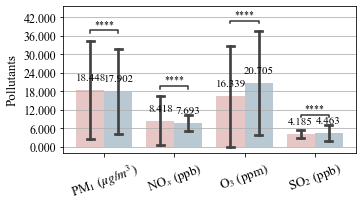

In [24]:
order = ['PM1', 'NOx', 'O3', 'SO2']
hue_order = ["jh","cm"]

par1=[]
import itertools
for o in order:
    par2=[]
    for u in hue_order:
        par2.append((o,u))
    par2=tuple(itertools.combinations(par2,2))
    for y in par2:
        par1.append(y)


fig, ax = plt.subplots(1, 1, figsize=(36/7, 3))
df_melted = datacluster.melt(id_vars=["Place"], value_vars=y_columns,
                    var_name='Variable', value_name='Value')
pax=sns.barplot(x='Variable', y='Value', data=df_melted, ci="sd", capsize=0.1, palette=["#EBC2C0", "#B3CAD8"],ax=ax,hue="Place",
          order=order, hue_order=hue_order)


ax.set_xticklabels(['PM$_1$ ($μg/m^3$)', 'NO$_x$ (ppb)', 'O$_3$ (ppm)', 'SO$_2$ (ppb)'])


for label in ax.get_yticklabels():
    label.set_fontsize(12)
    # label.set_rotation(45)

for label in ax.get_xticklabels():
    label.set_fontsize(13)
    label.set_rotation(20)


def format_ticks(x, pos):
    return f'{x:.3f}'  # 这里设置为保留两位小数，您可以根据需要进行修改
# 设置x轴刻度的格式
ax.yaxis.set_major_formatter(FuncFormatter(format_ticks))
ax.yaxis.set_major_locator(MaxNLocator(nbins=8))


ax.set_xlabel('')
ax.set_ylabel('Pollutants',fontsize=13)
ax.grid(axis="y")
ax.legend(frameon=False,loc=2,fontsize=13)

for i in range(2):
    pax.bar_label(pax.containers[i], labels=[f'{x.get_height():.3f}' for o,x in enumerate(pax.containers[i])],fontsize=11, padding=8)



from statannotations.Annotator import Annotator
annot = Annotator(ax=ax, pairs=par1, x='Variable', y='Value', data=df_melted, hide_non_significant=True,
          order=order, hue_order=hue_order,hue="Place")
annot.configure(test='t-test_ind', verbose=2)
annot.apply_test()
annot.annotate()

# Removing the legend
ax.get_legend().remove()

plt.tight_layout()
plt.savefig(f'污染物 bar.svg', bbox_inches='tight')
plt.show()

C:\Users\aa271\AppData\Local\Temp\ipykernel_23728\1343497805.py:18: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  pax=sns.barplot(x='Variable', y='Value', data=df_melted, ci="sd", capsize=0.1, palette=["#EBC2C0", "#B3CAD8"],ax=ax,hue="Place",


p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

地面层温度_jh vs. 地面层温度_cm: t-test independent samples, P_val:0.000e+00 t=-1.167e+02
地面层净辐射_jh vs. 地面层净辐射_cm: t-test independent samples, P_val:0.000e+00 t=1.003e+02
地面层湿度_jh vs. 地面层湿度_cm: t-test independent samples, P_val:0.000e+00 t=-1.020e+02


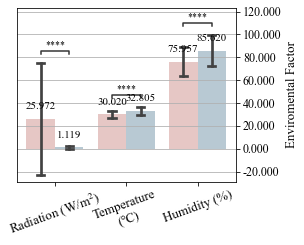

In [23]:
order = ['地面层净辐射', '地面层温度', '地面层湿度']
hue_order = ["jh","cm"]

par1=[]
import itertools
for o in order:
    par2=[]
    for u in hue_order:
        par2.append((o,u))
    par2=tuple(itertools.combinations(par2,2))
    for y in par2:
        par1.append(y)


fig, ax = plt.subplots(1, 1, figsize=(30/7, 3.5))
df_melted = datacluster.melt(id_vars=["Place"], value_vars=y_columns,
                    var_name='Variable', value_name='Value')
pax=sns.barplot(x='Variable', y='Value', data=df_melted, ci="sd", capsize=0.1, palette=["#EBC2C0", "#B3CAD8"],ax=ax,hue="Place",
          order=order, hue_order=hue_order)


ax.yaxis.tick_right()
ax.yaxis.set_label_position('right')


ax.set_xticklabels(['Radiation (W/m$^2$)', 'Temperature\n(℃)', 'Humidity (%)'])


for label in ax.get_yticklabels():
    label.set_fontsize(12)
    # label.set_rotation(45)

for label in ax.get_xticklabels():
    label.set_fontsize(13)
    label.set_rotation(20)


def format_ticks(x, pos):
    return f'{x:.3f}'  # 这里设置为保留两位小数，您可以根据需要进行修改
# 设置x轴刻度的格式
ax.yaxis.set_major_formatter(FuncFormatter(format_ticks))
ax.yaxis.set_major_locator(MaxNLocator(nbins=8))


ax.set_xlabel('')
ax.set_ylabel('Enviromental Factor',fontsize=13)
ax.grid(axis="y")
ax.legend(frameon=False,loc=2,fontsize=13)

for i in range(2):
    pax.bar_label(pax.containers[i], labels=[f'{x.get_height():.3f}' for o,x in enumerate(pax.containers[i])],fontsize=11, padding=8)



from statannotations.Annotator import Annotator
annot = Annotator(ax=ax, pairs=par1, x='Variable', y='Value', data=df_melted, hide_non_significant=True,
          order=order, hue_order=hue_order,hue="Place")
annot.configure(test='t-test_ind', verbose=2)
annot.apply_test()
annot.annotate()

# Removing the legend
ax.get_legend().remove()

plt.tight_layout()
plt.savefig(f'环境因子 bar.svg', bbox_inches='tight')
plt.show()